In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/2023년_카이스트_금융시계열/1주차실습/1. 금융시계열 실습')

In [3]:
# AR 모형을 임의로 생성하고, AR 파라메터가 변할 때 시계열의 모습이 어떻게
# 변하는지 육안으로 확인한다. AR 파라메터의 특성을 직관적으로 이해한다.
# 또한, AR 모형에 대한 ACF와 PACF 특성을 육안으로 확인한다.
# ACF/PACF는 향후 실제 시계열을 분석할 때 분석 모델을 선정에 참고한다.

In [8]:
import warnings
warnings.filterwarnings('ignore')
# --------------------------------------------------------------------
import matplotlib.pyplot as plt
from MyUtil.MyTimeSeries import sampleARIMA
from statsmodels.tsa.arima.model import ARIMA

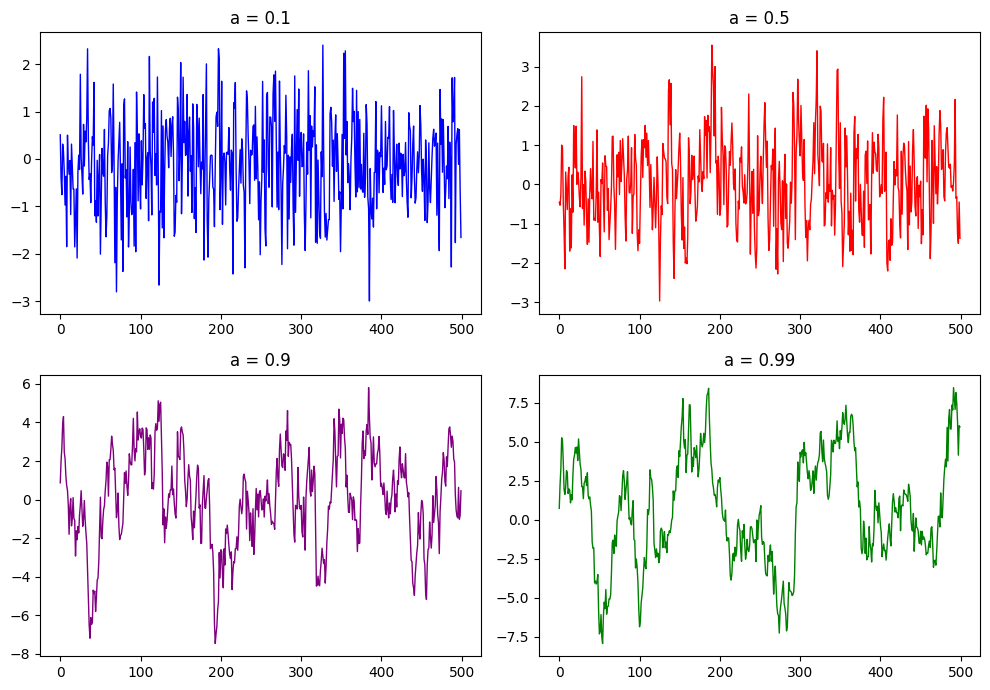

In [9]:
# AR(1) 모형의 parameter 변화에 따른 그래프 모양을 확인한다.
# a 값을 변화시켜 가면서 그래프의 모양이 어떻게 바뀌는지 확인한다.
y1 = sampleARIMA(ar=[0.1], d=0, ma=[0], n=500)
y2 = sampleARIMA(ar=[0.5], d=0, ma=[0], n=500)
y3 = sampleARIMA(ar=[0.9], d=0, ma=[0], n=500)
y4 = sampleARIMA(ar=[0.99], d=0, ma=[0], n=500)

fig = plt.figure(figsize=(10, 7))
p1 = fig.add_subplot(2,2,1)
p2 = fig.add_subplot(2,2,2)
p3 = fig.add_subplot(2,2,3)
p4 = fig.add_subplot(2,2,4)

p1.plot(y1, color='blue', linewidth=1)
p2.plot(y2, color='red', linewidth=1)
p3.plot(y3, color='purple', linewidth=1)
p4.plot(y4, color='green', linewidth=1)
p1.set_title("a = 0.1")
p2.set_title("a = 0.5")
p3.set_title("a = 0.9")
p4.set_title("a = 0.99")
plt.tight_layout()
plt.show()

In [10]:
# 임의로 생성한 AR(1) 샘플 데이터를 분석하여 a 값을 추정해 본다.
# 생성할 때 지정한 값으로 추정이 잘되는지 확인한다.
y = sampleARIMA(ar=[0.5], d=0, ma=[0], n=500)
model = ARIMA(y, order=(1,0,0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -691.754
Date:                Tue, 24 Oct 2023   AIC                           1389.508
Time:                        04:06:20   BIC                           1402.152
Sample:                             0   HQIC                          1394.470
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1616      0.090      1.802      0.072      -0.014       0.337
ar.L1          0.5142      0.039     13.167      0.000       0.438       0.591
sigma2         0.9310      0.060     15.527      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -729.214
Date:                Tue, 24 Oct 2023   AIC                           1466.428
Time:                        04:06:21   BIC                           1483.286
Sample:                             0   HQIC                          1473.043
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0187      0.035      0.539      0.590      -0.049       0.087
ar.L1          0.1202      0.041      2.964      0.003       0.041       0.200
ar.L2         -0.4787      0.040    -11.846      0.0

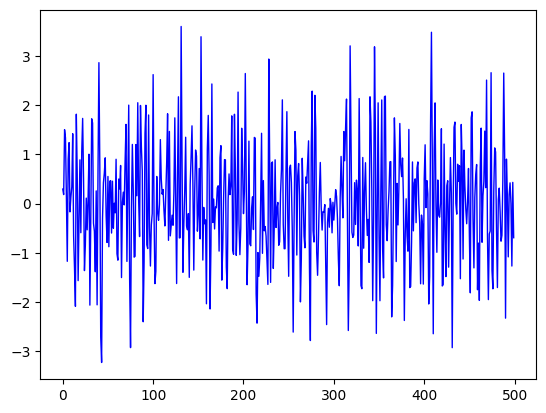

In [11]:
# AR(2) 모형도 확인해 본다
y = sampleARIMA(ar=[0.1, -0.4], d=0, ma=[0], n=500)
plt.plot(y, color='blue', linewidth=1)
model = ARIMA(y, order=(2,0,0)).fit()
print(model.summary())

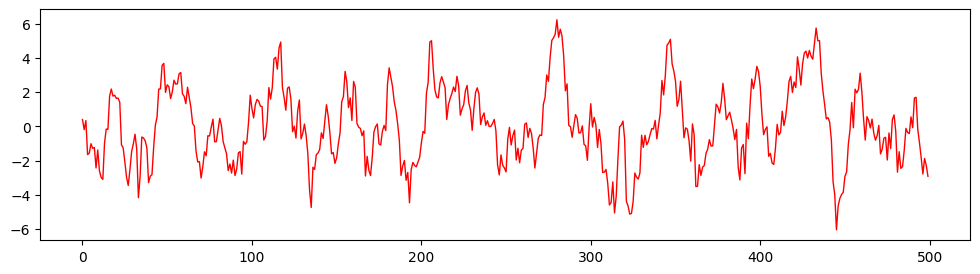

In [12]:
# AR 모형의 ACF와 PACD를 확인해 본다. a값을 변화시켜 가면서 비교해 본다
# ACF와 PACF는 향후 실제 시계열을 어느 모형으로 분석할 지에 대한 단서를 제공한다
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
y = sampleARIMA(ar=[0.9], d=0, ma=[0], n=500)
fig = plt.figure(figsize=(12, 3))
plt.plot(y, color='red', linewidth=1)
plt.show()

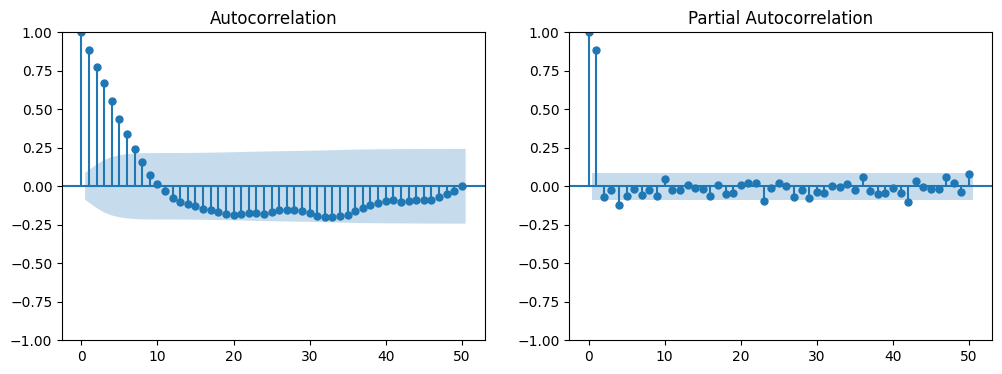

In [13]:
fig = plt.figure(figsize=(12, 4))
p1 = fig.add_subplot(1,2,1)
p2 = fig.add_subplot(1,2,2)
plot_acf(y, p1, lags=50)
plot_pacf(y, p2, lags=50)
plt.show()
